In [30]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [31]:
# List of file paths for your CSV files
file_paths = [
    "../data/benin-malanville.csv",
    "../data/sierraleone-bumbuna.csv",
    "../data/togo-dapaong_qc.csv",
]

In [32]:
# List to store DataFrames
dfs = []

# Loop over file paths and read CSV files into DataFrames
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

In [33]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [34]:
df.shape

(525600, 19)

In [35]:
df.describe

<bound method NDFrame.describe of                Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1       2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2       2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3       2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4       2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-10-24 23:56 -0.8  0.0  0.0   0.0   0.0  25.2  53.8  0.0     0.0   
525596  2022-10-24 23:57 -0.9  0.0  0.0   0.0   0.0  25.3  53.5  0.0     0.0   
525597  2022-10-24 23:58 -1.0  0.0  0.0   0.0   0.0  25.3  53.4  0.0     0.0   
525598  2022-10-24 23:59 -1.1  0.0  0.0   0.0   0.0  25.4  53.5  0.0     0.0   
525599  2022-10-25 00:00 -1.2  0.0  0.0   0.0   0.0  25.4  52.3  0.0     0.0   

     

In [36]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for negative values in specific columns
negative_values = df[["GHI", "DNI", "DHI"]].lt(0).sum()
print("\nNegative Values in GHI, DNI, DHI:\n", negative_values)

Missing Values:
 Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Negative Values in GHI, DNI, DHI:
 GHI    257385
DNI         0
DHI         0
dtype: int64


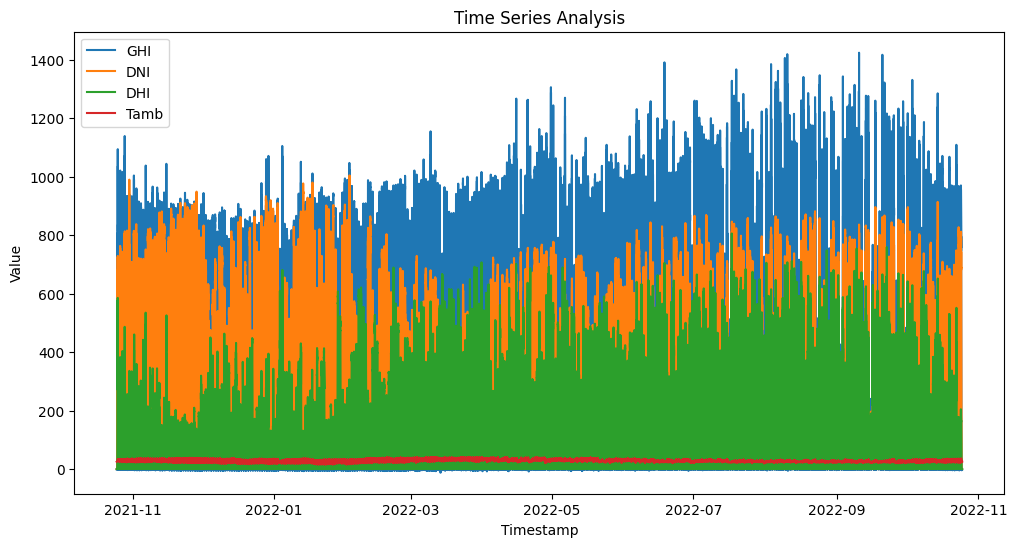

In [37]:
# Convert 'Timestamp' column to datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

# Plot GHI, DNI, DHI, and Tamb over time
plt.figure(figsize=(12, 6))
plt.plot(df["Timestamp"], df["GHI"], label="GHI")
plt.plot(df["Timestamp"], df["DNI"], label="DNI")
plt.plot(df["Timestamp"], df["DHI"], label="DHI")
plt.plot(df["Timestamp"], df["Tamb"], label="Tamb")
plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.title("Time Series Analysis")
plt.legend()
plt.show()

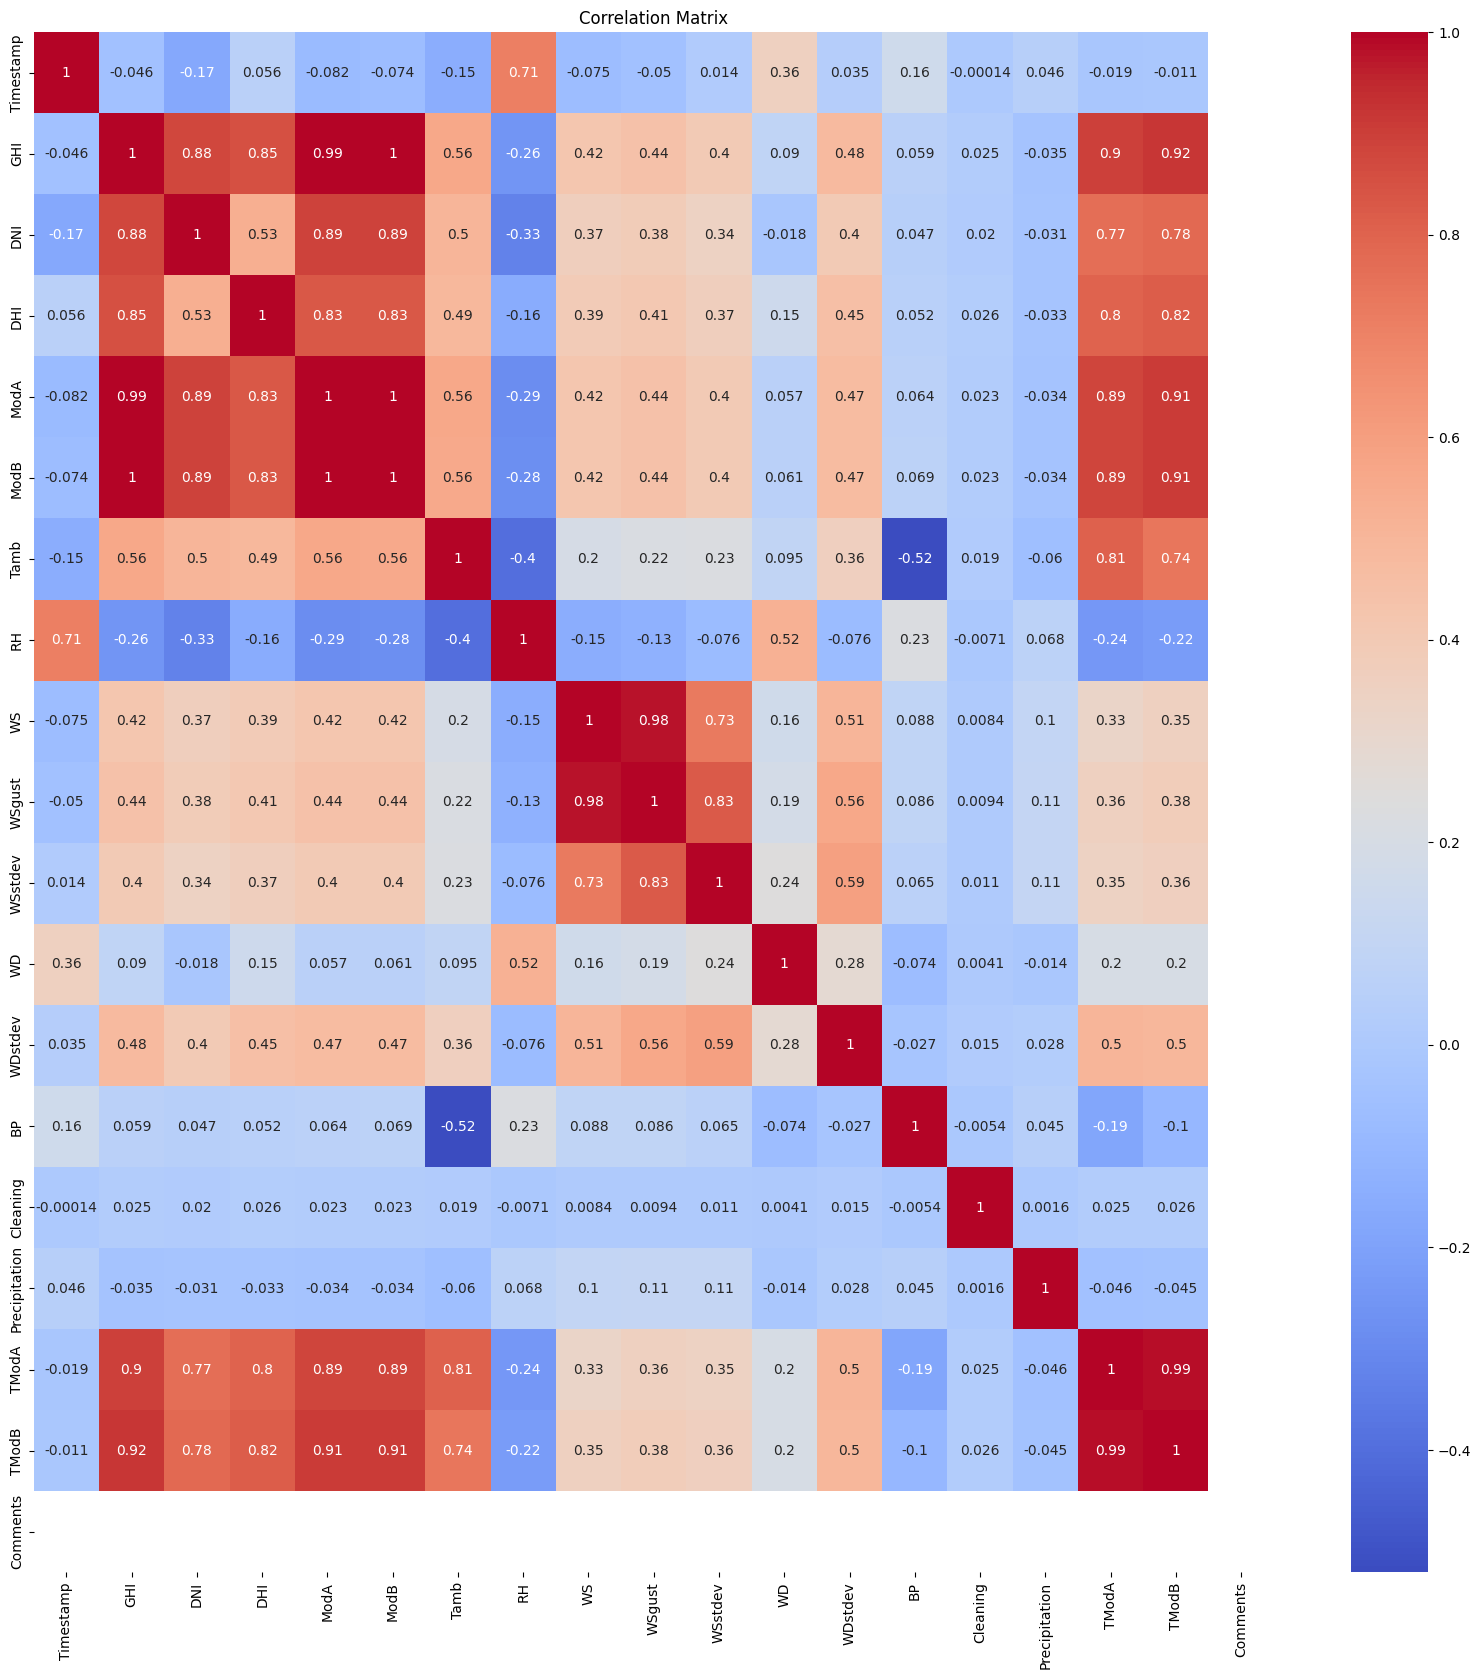

In [38]:
correlation_matrix = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

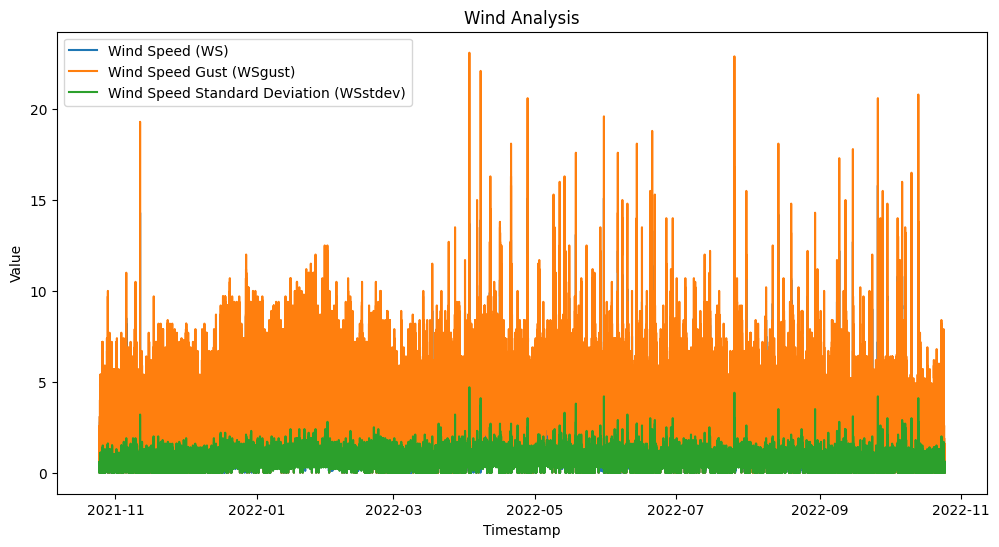

In [39]:
# Plot wind speed (WS, WSgust, WSstdev)
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['WS'], label='Wind Speed (WS)')
plt.plot(df['Timestamp'], df['WSgust'], label='Wind Speed Gust (WSgust)')
plt.plot(df['Timestamp'], df['WSstdev'], label='Wind Speed Standard Deviation (WSstdev)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Wind Analysis')
plt.legend()
plt.show()

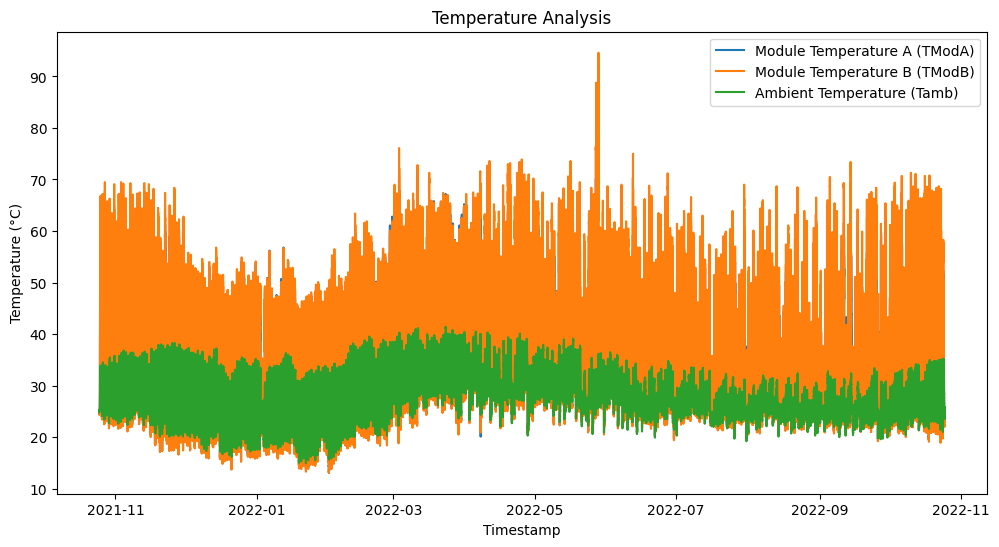

In [40]:
# Plot module temperatures (TModA, TModB) and ambient temperature (Tamb)
plt.figure(figsize=(12, 6))
plt.plot(df["Timestamp"], df["TModA"], label="Module Temperature A (TModA)")
plt.plot(df["Timestamp"], df["TModB"], label="Module Temperature B (TModB)")
plt.plot(df["Timestamp"], df["Tamb"], label="Ambient Temperature (Tamb)")
plt.xlabel("Timestamp")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Analysis")
plt.legend()
plt.show()

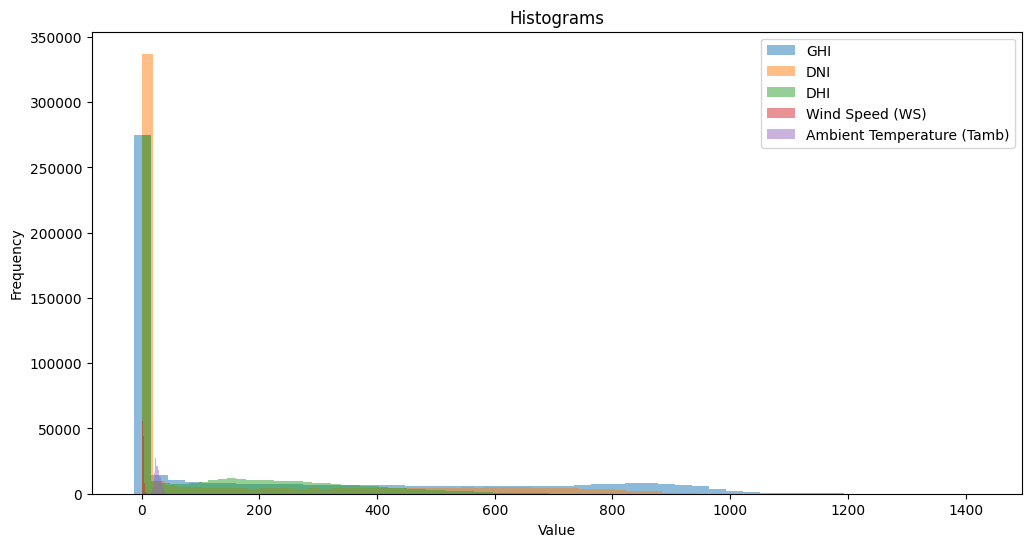

In [41]:
# Create histograms for GHI, DNI, DHI, WS, and temperatures
plt.figure(figsize=(12, 6))
plt.hist(df["GHI"], bins=50, alpha=0.5, label="GHI")
plt.hist(df["DNI"], bins=50, alpha=0.5, label="DNI")
plt.hist(df["DHI"], bins=50, alpha=0.5, label="DHI")
plt.hist(df["WS"], bins=50, alpha=0.5, label="Wind Speed (WS)")
plt.hist(df["Tamb"], bins=50, alpha=0.5, label="Ambient Temperature (Tamb)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histograms")
plt.legend()
plt.show()

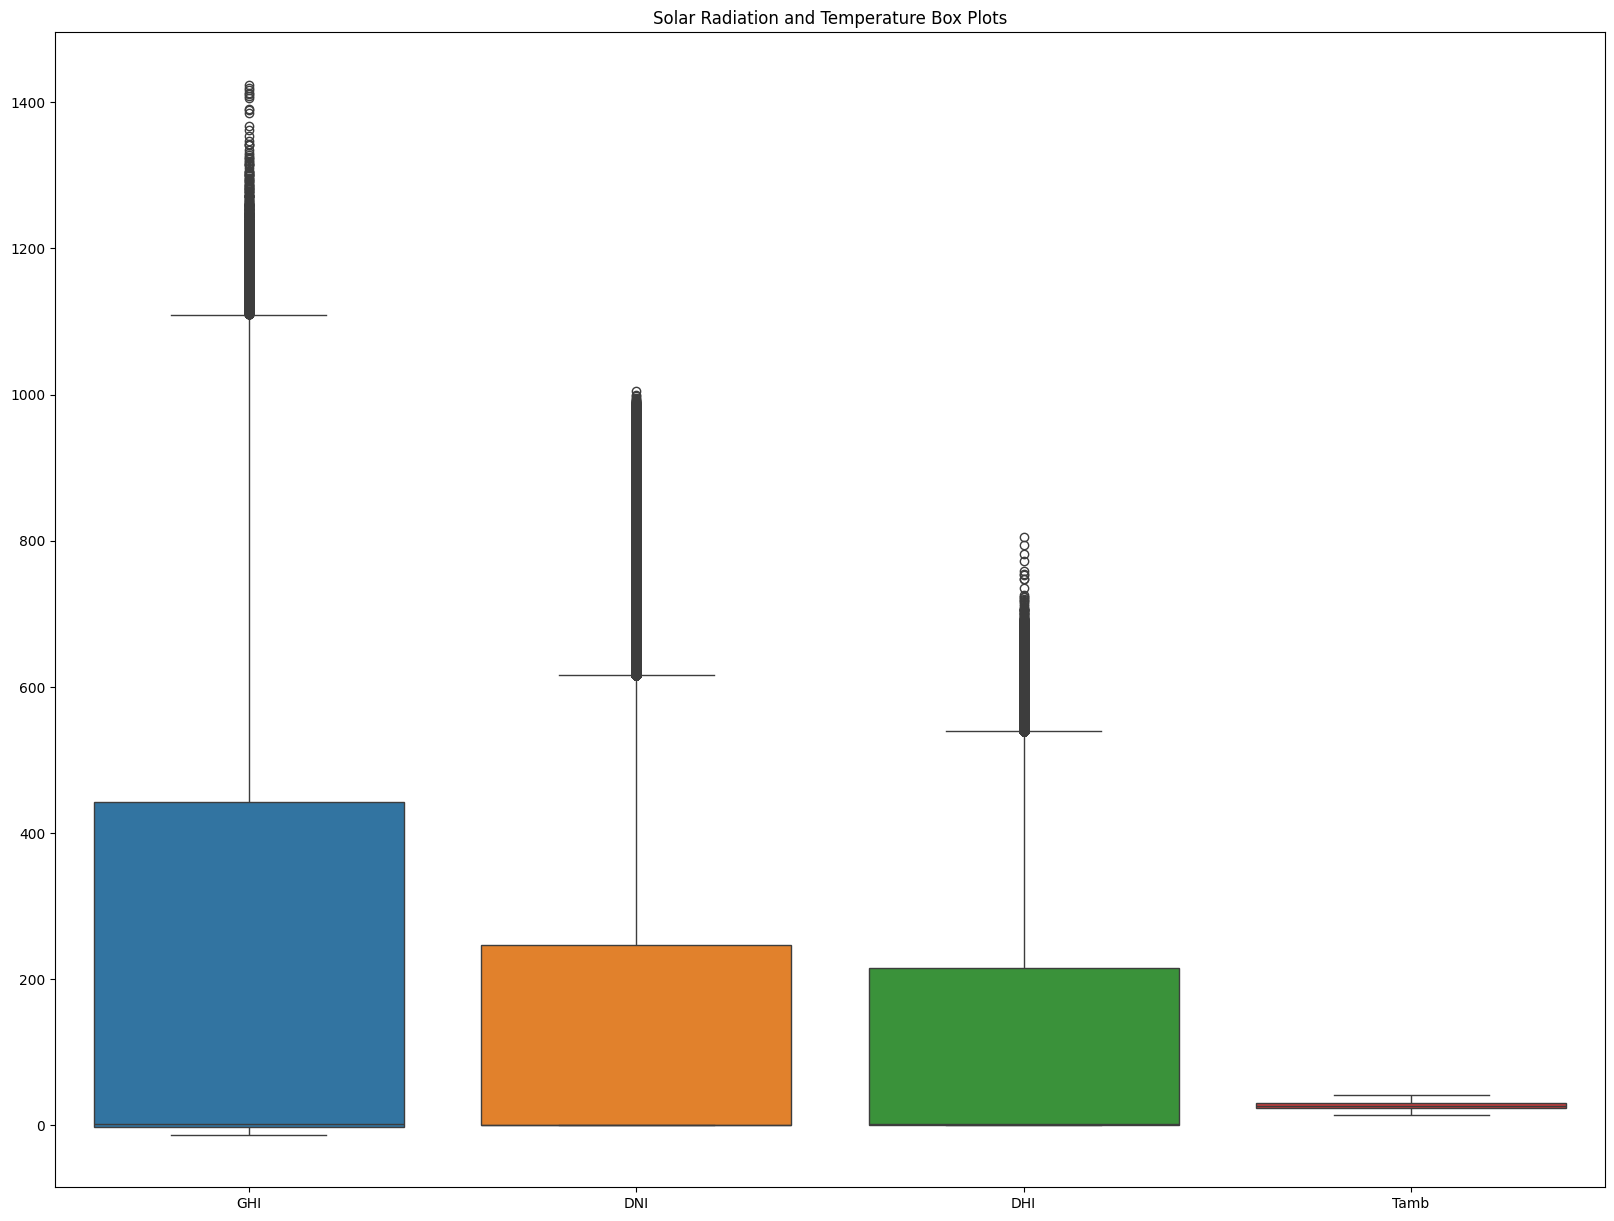

In [42]:
# Create box plots for GHI, DNI, DHI, and temperatures
plt.figure(figsize=(20, 15))
sns.boxplot(data=df[["GHI", "DNI", "DHI", "Tamb"]])
plt.title("Solar Radiation and Temperature Box Plots")
plt.show()

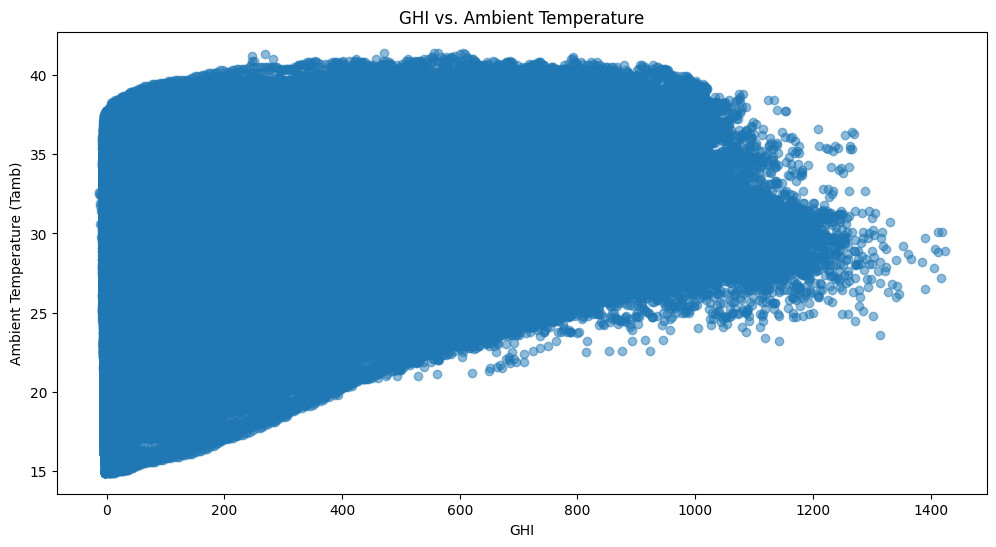

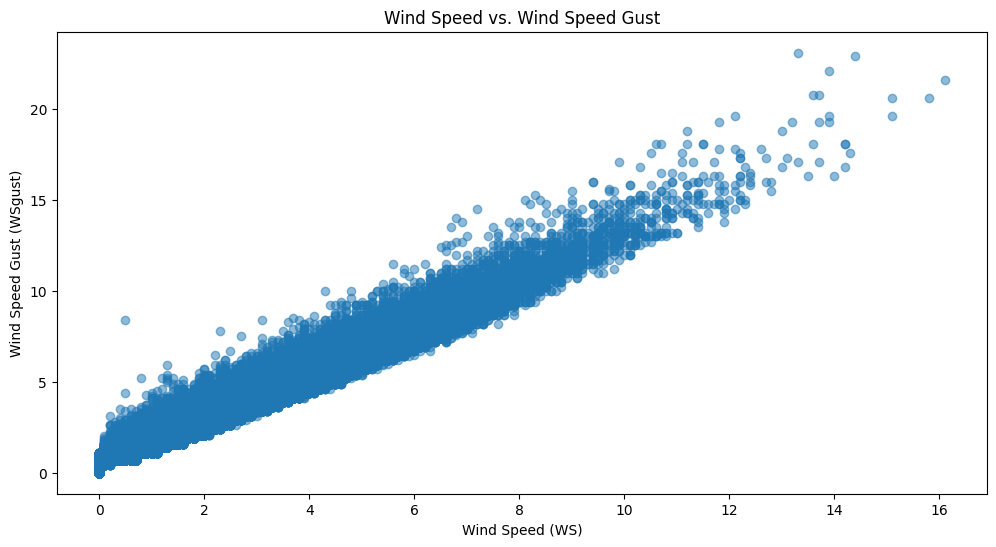

In [43]:
# Generate scatter plots for GHI vs. Tamb, WS vs. WSgust
plt.figure(figsize=(12, 6))
plt.scatter(df["GHI"], df["Tamb"], alpha=0.5)
plt.xlabel("GHI")
plt.ylabel("Ambient Temperature (Tamb)")
plt.title("GHI vs. Ambient Temperature")
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(df["WS"], df["WSgust"], alpha=0.5)
plt.xlabel("Wind Speed (WS)")
plt.ylabel("Wind Speed Gust (WSgust)")
plt.title("Wind Speed vs. Wind Speed Gust")
plt.show()